In [232]:
#Installing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score


In [268]:
#Importing data
m_sales = pd.read_excel('marketing_campaign.xlsx')

In [269]:
#Checking the data
m_sales.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,2013-05-08,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,...,20,1,0,0,0,0,0,3,11,0


In [270]:
#Checking the columns
m_sales.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [271]:
#Creating dataframe
df = pd.DataFrame(m_sales)

In [272]:
#Dropping the unwanted columns
sales_df=df.drop(columns=['AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2','Z_CostContact','Z_Revenue'])

In [273]:
#Printing the new dataframe
print(sales_df)

         ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  MntFishProducts  \
0            0  2012-09-04       58       635  ...              

In [274]:
#Data types
sales_df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
Complain                 int64
Response                 int64
dtype: object

In [275]:
#Education
value_mapping = {'Graduation': 1, 'PhD': 2,'Master':3, 'Basic':4,'2n Cycle':5}
sales_df['Education'].replace(value_mapping, inplace=True)
#print(sales_df)

In [276]:
#Marital_Status  
value_mapping_2 = {'Single':1, 'Together':2, 'Married':3, 'Divorced':4, 'Widow':5, 'Alone':6, 'Absurd':7, 'YOLO':8}
sales_df['Marital_Status'].replace(value_mapping_2, inplace=True)

In [277]:
#sales_df['Dt_Customer'] = sales_df['Dt_Customer'].astype(float)
sales_df['Dt_Customer'] = pd.to_datetime(sales_df['Dt_Customer'])

In [278]:
sales_df['Year'] = sales_df['Dt_Customer'].dt.year
sales_df['Month'] = sales_df['Dt_Customer'].dt.month
sales_df['Day'] = sales_df['Dt_Customer'].dt.day

In [279]:
print(sales_df)

         ID  Year_Birth  Education  Marital_Status   Income  Kidhome  \
0      5524        1957          1               1  58138.0        0   
1      2174        1954          1               1  46344.0        1   
2      4141        1965          1               2  71613.0        0   
3      6182        1984          1               2  26646.0        1   
4      5324        1981          2               3  58293.0        1   
...     ...         ...        ...             ...      ...      ...   
2235  10870        1967          1               3  61223.0        0   
2236   4001        1946          2               2  64014.0        2   
2237   7270        1981          1               4  56981.0        0   
2238   8235        1956          3               2  69245.0        0   
2239   9405        1954          2               3  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumDealsPurchases  \
0            0  2012-09-04       58       635  ...            

In [280]:
sales_df.dtypes

ID                              int64
Year_Birth                      int64
Education                       int64
Marital_Status                  int64
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
Complain                        int64
Response                        int64
Year                            int32
Month                           int32
Day                             int32
dtype: object

In [281]:
#Examining missing values
print(sales_df.isnull().mean())

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 0.010714
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
Complain               0.000000
Response               0.000000
Year                   0.000000
Month                  0.000000
Day                    0.000000
dtype: float64


In [282]:
#defining mean value to replace NAN
mean_value=sales_df['Income'].mean() 
print(mean_value)

52247.25135379061


In [283]:
#REplacing null values with the mean value
sales_df['Income'].fillna(value=mean_value, inplace=True) 
print('Updated Dataframe:') 
print(sales_df) 

Updated Dataframe:
         ID  Year_Birth  Education  Marital_Status   Income  Kidhome  \
0      5524        1957          1               1  58138.0        0   
1      2174        1954          1               1  46344.0        1   
2      4141        1965          1               2  71613.0        0   
3      6182        1984          1               2  26646.0        1   
4      5324        1981          2               3  58293.0        1   
...     ...         ...        ...             ...      ...      ...   
2235  10870        1967          1               3  61223.0        0   
2236   4001        1946          2               2  64014.0        2   
2237   7270        1981          1               4  56981.0        0   
2238   8235        1956          3               2  69245.0        0   
2239   9405        1954          2               3  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumDealsPurchases  \
0            0  2012-09-04       58       6

In [284]:
# Re-checking if the null values have been replaced
print(sales_df.isnull().mean())

ID                     0.0
Year_Birth             0.0
Education              0.0
Marital_Status         0.0
Income                 0.0
Kidhome                0.0
Teenhome               0.0
Dt_Customer            0.0
Recency                0.0
MntWines               0.0
MntFruits              0.0
MntMeatProducts        0.0
MntFishProducts        0.0
MntSweetProducts       0.0
MntGoldProds           0.0
NumDealsPurchases      0.0
NumWebPurchases        0.0
NumCatalogPurchases    0.0
NumStorePurchases      0.0
NumWebVisitsMonth      0.0
Complain               0.0
Response               0.0
Year                   0.0
Month                  0.0
Day                    0.0
dtype: float64


In [285]:
# Finding unique values in each column
for i in sales_df.columns:
    print(i,'\n',sales_df[i].unique(),'\n')

ID 
 [5524 2174 4141 ... 7270 8235 9405] 

Year_Birth 
 [1957 1954 1965 1984 1981 1967 1971 1985 1974 1950 1983 1976 1959 1952
 1987 1946 1980 1949 1982 1979 1951 1969 1986 1989 1963 1970 1973 1943
 1975 1996 1968 1964 1977 1978 1955 1966 1988 1948 1958 1972 1960 1945
 1991 1962 1953 1961 1956 1992 1900 1893 1990 1947 1899 1993 1994 1941
 1944 1995 1940] 

Education 
 [1 2 3 4 5] 

Marital_Status 
 [1 2 3 4 5 6 7 8] 

Income 
 [58138. 46344. 71613. ... 56981. 69245. 52869.] 

Kidhome 
 [0 1 2] 

Teenhome 
 [0 1 2] 

Dt_Customer 
 <DatetimeArray>
['2012-09-04 00:00:00', '2014-03-08 00:00:00', '2013-08-21 00:00:00',
 '2014-02-10 00:00:00', '2014-01-19 00:00:00', '2013-09-09 00:00:00',
 '2012-11-13 00:00:00', '2013-05-08 00:00:00', '2013-06-06 00:00:00',
 '2014-03-13 00:00:00',
 ...
 '2014-03-27 00:00:00', '2012-12-15 00:00:00', '2012-09-17 00:00:00',
 '2013-06-02 00:00:00', '2012-12-21 00:00:00', '2013-11-01 00:00:00',
 '2013-08-10 00:00:00', '2012-10-11 00:00:00', '2012-12-20 00:00:00',

In [286]:
#Manually checking the 'ID' col
list_ID =list(sales_df['ID'].unique())
list_ID.sort()
print(list_ID)

[0, 1, 9, 13, 17, 20, 22, 24, 25, 35, 48, 49, 55, 67, 73, 75, 78, 87, 89, 92, 113, 115, 123, 125, 143, 146, 153, 158, 164, 175, 176, 178, 182, 193, 194, 195, 199, 202, 203, 213, 217, 221, 231, 232, 234, 236, 238, 241, 246, 247, 252, 254, 255, 257, 263, 269, 271, 273, 274, 286, 291, 295, 304, 309, 310, 313, 322, 326, 332, 339, 340, 347, 359, 361, 367, 368, 375, 378, 380, 387, 405, 425, 433, 437, 448, 450, 451, 453, 454, 455, 456, 460, 466, 477, 486, 492, 498, 500, 503, 520, 521, 523, 524, 528, 531, 535, 538, 544, 550, 564, 569, 574, 577, 590, 591, 606, 607, 610, 615, 618, 624, 626, 635, 640, 641, 642, 663, 675, 679, 692, 697, 701, 702, 709, 713, 716, 736, 737, 738, 749, 760, 762, 771, 773, 793, 796, 798, 800, 803, 807, 810, 819, 821, 830, 832, 833, 837, 839, 843, 849, 850, 851, 868, 873, 879, 880, 891, 895, 898, 902, 905, 907, 916, 922, 933, 938, 940, 942, 944, 945, 946, 948, 954, 955, 961, 965, 966, 967, 968, 975, 977, 979, 983, 988, 999, 1000, 1008, 1010, 1012, 1016, 1020, 1029, 1030,

In [287]:
#Manually checkin the 'Income' col
list_Income =list(sales_df['Income'].unique())
list_Income.sort()
print(list_Income)

[1730.0, 2447.0, 3502.0, 4023.0, 4428.0, 4861.0, 5305.0, 5648.0, 6560.0, 6835.0, 7144.0, 7500.0, 8028.0, 8820.0, 8940.0, 9255.0, 9548.0, 9722.0, 10245.0, 10404.0, 10979.0, 11012.0, 11448.0, 12393.0, 12571.0, 13084.0, 13260.0, 13533.0, 13624.0, 13672.0, 13724.0, 14045.0, 14188.0, 14421.0, 14515.0, 14661.0, 14796.0, 14849.0, 14906.0, 14918.0, 15033.0, 15038.0, 15056.0, 15072.0, 15253.0, 15287.0, 15315.0, 15345.0, 15716.0, 15759.0, 15862.0, 16005.0, 16014.0, 16185.0, 16248.0, 16269.0, 16529.0, 16531.0, 16581.0, 16626.0, 16653.0, 16813.0, 16860.0, 16927.0, 17003.0, 17117.0, 17144.0, 17148.0, 17256.0, 17323.0, 17345.0, 17459.0, 17487.0, 17649.0, 17688.0, 18100.0, 18169.0, 18222.0, 18227.0, 18351.0, 18358.0, 18393.0, 18492.0, 18589.0, 18690.0, 18701.0, 18746.0, 18793.0, 18890.0, 18929.0, 18978.0, 18988.0, 19107.0, 19329.0, 19346.0, 19414.0, 19419.0, 19444.0, 19485.0, 19510.0, 19514.0, 19656.0, 19740.0, 19789.0, 19986.0, 20130.0, 20180.0, 20193.0, 20194.0, 20425.0, 20427.0, 20491.0, 20518.0, 

<Axes: >

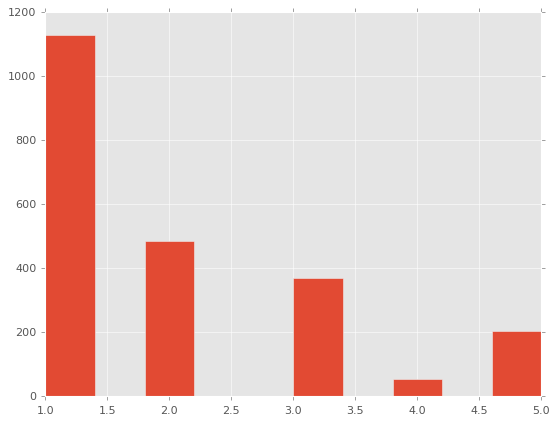

In [288]:
plt.style.use('ggplot') 
sales_df['Education'].hist() 

<Axes: xlabel='Income', ylabel='Year_Birth'>

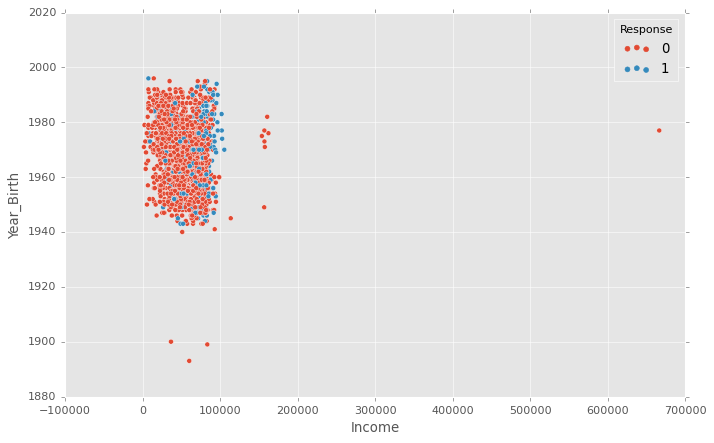

In [301]:

fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(data= sales_df,y =sales_df.Year_Birth,x= sales_df.Income, hue ='Response')

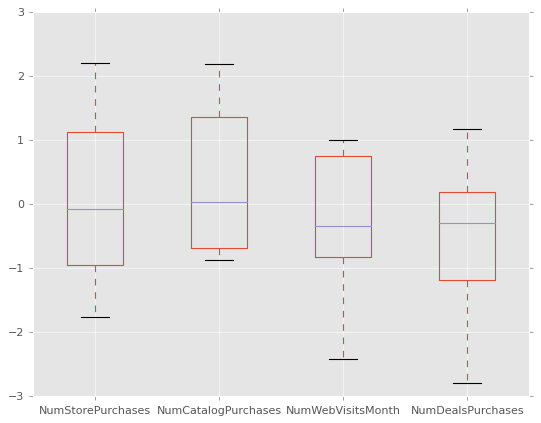

In [264]:
np.random.seed(1234)
sales_df = pd.DataFrame(np.random.randn(10, 4),
                  columns=['NumStorePurchases', 'NumCatalogPurchases', 'NumWebVisitsMonth', 'NumDealsPurchases'])
boxplot = sales_df.boxplot(column=['NumStorePurchases', 'NumCatalogPurchases', 'NumWebVisitsMonth', 'NumDealsPurchases']) 

In [256]:
## Modling

In [257]:
cols = list(sales_df.columns)

In [258]:
print(cols)2

['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'Response', 'Year', 'Month', 'Day']


In [259]:
#Training and Logistic
y = sales_df[['Response']]
x = sales_df [['ID', 'Year_Birth', 'Education', 'Marital_Status', 
                'Income', 'Kidhome', 'Teenhome','Recency', 'MntWines', 
                'MntFruits', 'MntMeatProducts', 'MntFishProducts','MntSweetProducts','MntGoldProds', 
                'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 
                'NumStorePurchases', 'NumWebVisitsMonth','Complain']]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
model = LogisticRegression(solver = 'liblinear',random_state=0).fit(x_train,y_train)
model.score(x_train,y_train)

/Users/dhwanipatel/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8666294642857143

In [128]:
y_pred = model.predict(x_test)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0]


In [155]:
#Confusion Matrix
cm =confusion_matrix(y_test, y_pred)

In [156]:
print(cm)

[[348  15]
 [ 73  12]]


In [ ]:
## SVM

In [123]:
from sklearn import svm
svm_model =svm.SVC(kernel='linear')
svm_final =svm_model.fit(x_train,y_train)
print("Accuracy:",svm_final.score(x_train,y_train))

/Users/dhwanipatel/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.8588169642857143


In [158]:
y_pred2 = svm_model.predict(x_test)
print(y_pred2)

[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 1 0
 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]


In [ ]:
## Confusion Matrix

In [159]:
cm_SVM=confusion_matrix(y_test, y_pred2)
print(cm_SVM)

[[348  15]
 [ 73  12]]


In [303]:
## LInear 
import statsmodels.api as sm
X2 = sm.add_constant(x_train)
est = sm.OLS(y.astype(float),x.astype(float))
est2 = est.fit()
print(est2.summary())

                                 OLS Regression Results                                
Dep. Variable:               Response   R-squared (uncentered):                   0.305
Model:                            OLS   Adj. R-squared (uncentered):              0.298
Method:                 Least Squares   F-statistic:                              48.66
Date:                Sun, 19 Nov 2023   Prob (F-statistic):                   9.94e-159
Time:                        23:41:38   Log-Likelihood:                         -639.84
No. Observations:                2240   AIC:                                      1320.
Df Residuals:                    2220   BIC:                                      1434.
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------